<a href="https://colab.research.google.com/github/akshykm/Supermarket-Retail-Analysis/blob/main/Supermarket_Retail_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
# Load the dataset
from google.colab import drive
drive.mount('/content/gdrive')
df = pd.read_csv('gdrive/My Drive/Supermarket Retail Analytics Dataset.csv')
display(df.head(10))

Mounted at /content/gdrive


,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State
0,OD1,Harish,Oil & Masala,Masalas,Vellore,11/8/2017,North,1254,0.12,401.28,Tamil Nadu
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,11/8/2017,South,749,0.18,149.80,Tamil Nadu
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,6/12/2017,West,2360,0.21,165.20,Tamil Nadu
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,10/11/2016,South,896,0.25,89.60,Tamil Nadu
4,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,10/11/2016,South,2355,0.26,918.45,Tamil Nadu
5,OD6,Adavan,Food Grains,Organic Staples,Dharmapuri,6/9/2015,West,2305,0.26,322.70,Tamil Nadu
6,OD7,Jonas,Fruits & Veggies,Fresh Vegetables,Trichy,6/9/2015,West,826,0.33,346.92,Tamil Nadu
7,OD8,Hafiz,Fruits & Veggies,Fresh Fruits,Ramanadhapuram,6/9/2015,West,1847,0.32,147.76,Tamil Nadu
8,OD9,Hafiz,Bakery,Biscuits,Tirunelveli,6/9/2015,West,791,0.23,181.93,Tamil Nadu
9,OD10,Krithika,Bakery,Cakes,Chennai,6/9/2015,West,1795,0.27,484.65,Tamil Nadu


In [3]:
#listing down the columns
df.columns.values

array(['Order ID', 'Customer Name', 'Category', 'Sub Category', 'City',
       'Order Date', 'Region', 'Sales', 'Discount', 'Profit', 'State'],
      dtype=object)

In [4]:
# Check for missing values
print("\nMissing Values:\n", df.isnull().sum())


Missing Values:
 Order ID         0
Customer Name    0
Category         0
Sub Category     0
City             0
Order Date       0
Region           0
Sales            0
Discount         0
Profit           0
State            0
dtype: int64


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order ID       9994 non-null   object 
 1   Customer Name  9994 non-null   object 
 2   Category       9994 non-null   object 
 3   Sub Category   9994 non-null   object 
 4   City           9994 non-null   object 
 5   Order Date     9994 non-null   object 
 6   Region         9994 non-null   object 
 7   Sales          9994 non-null   int64  
 8   Discount       9994 non-null   float64
 9   Profit         9994 non-null   float64
 10  State          9994 non-null   object 
dtypes: float64(2), int64(1), object(8)
memory usage: 859.0+ KB


In [7]:
# Check for duplicates
duplicates = df.duplicated().sum()
print(f" Duplicate Rows: {'None' if duplicates == 0 else duplicates}")

 Duplicate Rows: None


In [8]:
# Data types correction
df['Order Date'] = pd.to_datetime(df['Order Date'])

In [11]:
# Convert 'Order Date' to standard datetime format
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce', dayfirst=True)

In [12]:
# Rename 'State' to 'Store State'
df.rename(columns={'State': 'Store State'}, inplace=True)

In [13]:
# Group by city and count unique regions
city_region_count = df.groupby('City')['Region'].nunique().reset_index()

# Filter cities with more than 1 unique region
messy_cities = city_region_count[city_region_count['Region'] > 1]['City']

# Get distinct city-region combinations for those cities
inconsistent_region_data = df[df['City'].isin(messy_cities)][['City', 'Region']].drop_duplicates()

print(inconsistent_region_data)


               City Region
0           Vellore  North
1       Krishnagiri  South
2        Perambalur   West
3        Dharmapuri  South
4              Ooty  South
..              ...    ...
366        Dindigul   East
418           Karur  South
526          Trichy  South
586  Ramanadhapuram  South
706            Bodi  South

[97 rows x 2 columns]


In [54]:
df['Region'] = 'South'

In [55]:
display(df.head(10))

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State,Month,Discount Range
0,OD1,Harish,Oil & Masala,Masalas,Vellore,2017-11-08,South,1254,0.12,401.28,Tamil Nadu,2017-11,10-20%
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,2017-11-08,South,749,0.18,149.80,Tamil Nadu,2017-11,10-20%
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,2017-06-12,South,2360,0.21,165.20,Tamil Nadu,2017-06,20-30%
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,2016-10-11,South,896,0.25,89.60,Tamil Nadu,2016-10,20-30%
4,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,2016-10-11,South,2355,0.26,918.45,Tamil Nadu,2016-10,20-30%
5,OD6,Adavan,Food Grains,Organic Staples,Dharmapuri,2015-06-09,South,2305,0.26,322.70,Tamil Nadu,2015-06,20-30%
6,OD7,Jonas,Fruits & Veggies,Fresh Vegetables,Trichy,2015-06-09,South,826,0.33,346.92,Tamil Nadu,2015-06,>30%
7,OD8,Hafiz,Fruits & Veggies,Fresh Fruits,Ramanadhapuram,2015-06-09,South,1847,0.32,147.76,Tamil Nadu,2015-06,>30%
8,OD9,Hafiz,Bakery,Biscuits,Tirunelveli,2015-06-09,South,791,0.23,181.93,Tamil Nadu,2015-06,20-30%
9,OD10,Krithika,Bakery,Cakes,Chennai,2015-06-09,South,1795,0.27,484.65,Tamil Nadu,2015-06,20-30%


In [16]:
# Summary statistics
print("Profit Summary Stats:")
print(df['Profit'].describe())

# Count of negative profit (losses)
loss_count = df[df['Profit'] < 0].shape[0]
print(f"\nNumber of transactions with a loss (negative profit): {loss_count}")

# Count of zero profit
zero_profit_count = (df['Profit'] == 0).sum()
print(f"\nNumber of transactions with zero profit: {zero_profit_count}")


Profit Summary Stats:
count    9994.000000
mean      374.937082
std       239.932881
min        25.250000
25%       180.022500
50%       320.780000
75%       525.627500
max      1120.950000
Name: Profit, dtype: float64

Number of transactions with a loss (negative profit): 0

Number of transactions with zero profit: 0


In [17]:
# Export cleaned file
df.to_csv("supermart_sales_cleaned.csv", index=False)

In [35]:
from google.colab import files
files.download("supermart_sales_cleaned.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [19]:
# Total Sales Revenue
Total_Sales = df['Sales'].sum()
print(f"Total Sales Revenue: ₹{Total_Sales:,.2f}")

Total Sales Revenue: ₹14,956,982.00


In [20]:
# Total Profit
total_profit = df['Profit'].sum()
print(f"Total Profit: ₹{total_profit:,.2f}")

Total Profit: ₹3,747,121.20


In [21]:
# Descriptive stats
avg_sales = df['Sales'].mean()
std_sales = df['Sales'].std()

avg_discount = df['Discount'].mean()
std_discount = df['Discount'].std()

avg_profit = df['Profit'].mean()
std_profit = df['Profit'].std()
max_profit = df['Profit'].max()

print(f"\n Descriptive Statistics:")
print(f"• Average Sales: ₹{avg_sales:.2f} (Std Dev: ₹{std_sales:.2f})")
print(f"• Average Discount: {avg_discount * 100:.2f}% (Std Dev: {std_discount * 100:.2f}%)")
print(f"• Average Profit: ₹{avg_profit:.2f} (Std Dev: ₹{std_profit:.2f})")
print(f"• Maximum Profit: ₹{max_profit:.2f}")


 Descriptive Statistics:
• Average Sales: ₹1496.60 (Std Dev: ₹577.56)
• Average Discount: 22.68% (Std Dev: 7.46%)
• Average Profit: ₹374.94 (Std Dev: ₹239.93)
• Maximum Profit: ₹1120.95


In [16]:
# Loss-Making Products
print("\n Loss-Making Sub-Categories:")
loss_subcat = df.groupby("Sub Category")[['Sales', 'Profit']].sum()
loss_subcat = loss_subcat[loss_subcat['Profit'] < 0]
print(loss_subcat.sort_values(by='Profit'))


 Loss-Making Sub-Categories:
Empty DataFrame
Columns: [Sales, Profit]
Index: []


In [22]:
# Sales by Category
sales_by_category = df.groupby('Category')['Sales'].sum().sort_values(ascending=False)
print("\nSales by Category:")
print(sales_by_category)


Sales by Category:
Category
Eggs, Meat & Fish    2267401
Snacks               2237546
Food Grains          2115272
Bakery               2112281
Fruits & Veggies     2100727
Beverages            2085313
Oil & Masala         2038442
Name: Sales, dtype: int64


In [23]:
# Category Wise Performance
category_kpis = df.groupby('Category')[['Sales', 'Profit']].sum()
category_kpis['Profit Margin (%)'] = (category_kpis['Profit'] / category_kpis['Sales']) * 100
category_kpis = category_kpis.sort_values(by='Sales', ascending=False)

print("Category Performance:\n", category_kpis)

Category Performance:
                      Sales     Profit  Profit Margin (%)
Category                                                
Eggs, Meat & Fish  2267401  567357.22          25.022359
Snacks             2237546  568178.85          25.392946
Food Grains        2115272  529162.64          25.016293
Bakery             2112281  528521.06          25.021342
Fruits & Veggies   2100727  530400.38          25.248420
Beverages          2085313  525605.76          25.205126
Oil & Masala       2038442  497895.29          24.425286


In [24]:
# Sales by Sub-Category
sales_by_subcategory = df.groupby('Sub Category')['Sales'].sum().sort_values(ascending=False)
print("\nSales by Sub-Category:")
print(sales_by_subcategory)


Sales by Sub-Category:
Sub Category
Health Drinks         1051439
Soft Drinks           1033874
Cookies                768213
Breads & Buns          742586
Noodles                735435
Chocolates             733898
Masalas                697480
Cakes                  685612
Biscuits               684083
Spices                 672876
Edible Oil & Ghee      668086
Mutton                 611200
Eggs                   575156
Fish                   560548
Organic Staples        558929
Fresh Fruits           551212
Atta & Flour           534649
Fresh Vegetables       525842
Dals & Pulses          523371
Chicken                520497
Organic Vegetables     520271
Organic Fruits         503402
Rice                   498323
Name: Sales, dtype: int64


In [34]:
# Sub Category Wise Performance
subcategory_kpis = df.groupby('Sub Category')[['Sales', 'Profit']].sum()
subcategory_kpis['Profit Margin (%)'] = (subcategory_kpis['Profit'] / subcategory_kpis['Sales']) * 100
subcategory_kpis = subcategory_kpis.sort_values(by='Sales', ascending=False)

print("Sub Category Performance:\n", subcategory_kpis)

Sub Category Performance:
                       Sales     Profit  Profit Margin (%)
Sub Category                                             
Health Drinks       1051439  267469.79          25.438451
Soft Drinks         1033874  258135.97          24.967837
Cookies              768213  190643.70          24.816516
Breads & Buns        742586  190764.98          25.689278
Noodles              735435  193685.81          26.336224
Chocolates           733898  183849.34          25.051075
Masalas              697480  168999.11          24.229958
Cakes                685612  168398.46          24.561773
Biscuits             684083  169357.62          24.756882
Spices               672876  160302.60          23.823498
Edible Oil & Ghee    668086  168593.58          25.235311
Mutton               611200  151389.40          24.769208
Eggs                 575156  144669.92          25.153162
Fish                 560548  147248.01          26.268582
Organic Staples      558929  144136.89       

In [13]:
# Sub-Categories with High Profit Margins
print("\n Sub-Categories with High Profit Margins:")
subcat_perf = df.groupby("Sub Category")[['Sales', 'Profit']].sum()
subcat_perf['Profit Margin %'] = (subcat_perf['Profit'] / subcat_perf['Sales']) * 100
high_margin_subcats = subcat_perf.sort_values(by='Profit Margin %', ascending=False)
print(high_margin_subcats.head(5))


 Sub-Categories with High Profit Margins:
                  Sales     Profit  Profit Margin %
Sub Category                                       
Noodles          735435  193685.81        26.336224
Fish             560548  147248.01        26.268582
Organic Fruits   503402  130862.33        25.995592
Organic Staples  558929  144136.89        25.788050
Breads & Buns    742586  190764.98        25.689278


In [14]:
# Regional Growth Opportunities
print("\n Sales and Profit by City:")
city_perf = df.groupby("City")[['Sales', 'Profit']].sum()
city_perf['Profit Margin %'] = (city_perf['Profit'] / city_perf['Sales']) * 100
print(city_perf.sort_values(by='Profit', ascending=False).head(10))  # High revenue cities
print("\nCities with Best Margins:")
print(city_perf.sort_values(by='Profit Margin %', ascending=False).head(10))  # Smaller cities might rank here


 Sales and Profit by City:
              Sales     Profit  Profit Margin %
City                                           
Vellore      676550  174073.01        25.729511
Bodi         667177  173655.13        26.028345
Kanyakumari  706764  172217.74        24.367079
Perambalur   659738  171132.19        25.939417
Karur        642273  169305.94        26.360432
Tirunelveli  659812  165169.01        25.032738
Pudukottai   653179  164072.63        25.119091
Chennai      634963  160921.33        25.343418
Salem        657093  160899.30        24.486534
Krishnagiri  637273  160477.48        25.181905

Cities with Best Margins:
                 Sales     Profit  Profit Margin %
City                                              
Karur           642273  169305.94        26.360432
Bodi            667177  173655.13        26.028345
Perambalur      659738  171132.19        25.939417
Vellore         676550  174073.01        25.729511
Chennai         634963  160921.33        25.343418
Krishnagiri 

In [15]:
# Monthly Sales Trend (First 5 months)
# ------------------------
df['Month'] = df['Order Date'].dt.to_period('M')
monthly_sales = df.groupby('Month')['Sales'].sum().sort_index()
first_5_months = monthly_sales.head(5)

print("\n Monthly Sales (First 5 Months):")
print(first_5_months)


 Monthly Sales (First 5 Months):
Month
2015-01    122497
2015-02     66030
2015-03    247156
2015-04    203258
2015-05    164263
Freq: M, Name: Sales, dtype: int64


In [11]:
# 4. Seasonal Peaks (Oct-Dec)
print("\n4. Monthly Sales Trend:")
df['Month'] = df['Order Date'].dt.month
monthly_sales = df.groupby("Month")['Sales'].sum()
print(monthly_sales)


4. Monthly Sales Trend:
Month
1      577972
2      456102
3     1053980
4      998453
5     1086920
6     1057808
7     1089385
8     1046807
9     2064266
10    1243289
11    2193924
12    2088076
Name: Sales, dtype: int64

6. Loss-Making Sub-Categories:
Empty DataFrame
Columns: [Sales, Profit]
Index: []


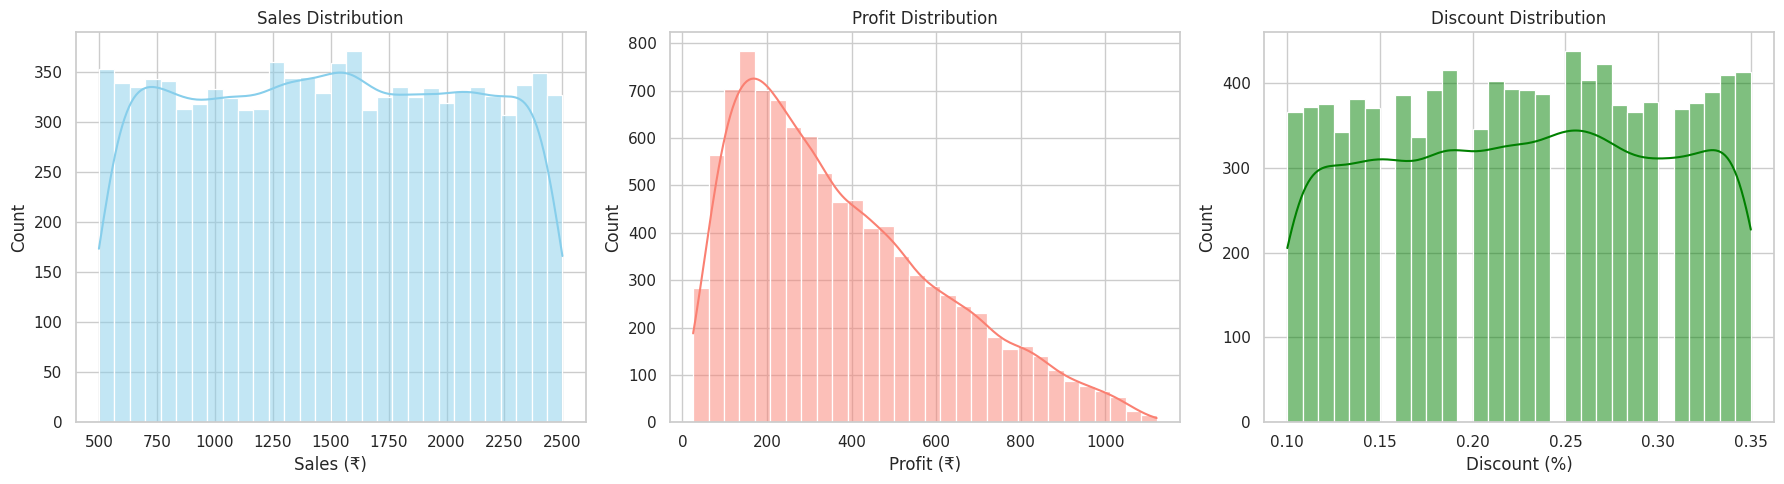

In [26]:
#Sales, Profit and Discount Distribution
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set(style='whitegrid')
plt.figure(figsize=(18, 5))

# Sales Distribution
plt.subplot(1, 3, 1)
sns.histplot(df['Sales'], bins=30, color='skyblue', kde=True)
plt.title("Sales Distribution")
plt.xlabel("Sales (₹)")

# Profit Distribution
plt.subplot(1, 3, 2)
sns.histplot(df['Profit'], bins=30, color='salmon', kde=True)
plt.title("Profit Distribution")
plt.xlabel("Profit (₹)")

# Discount Distribution
plt.subplot(1, 3, 3)
sns.histplot(df['Discount'], bins=30, color='green', kde=True)
plt.title("Discount Distribution")
plt.xlabel("Discount (%)")

plt.tight_layout()
plt.show()


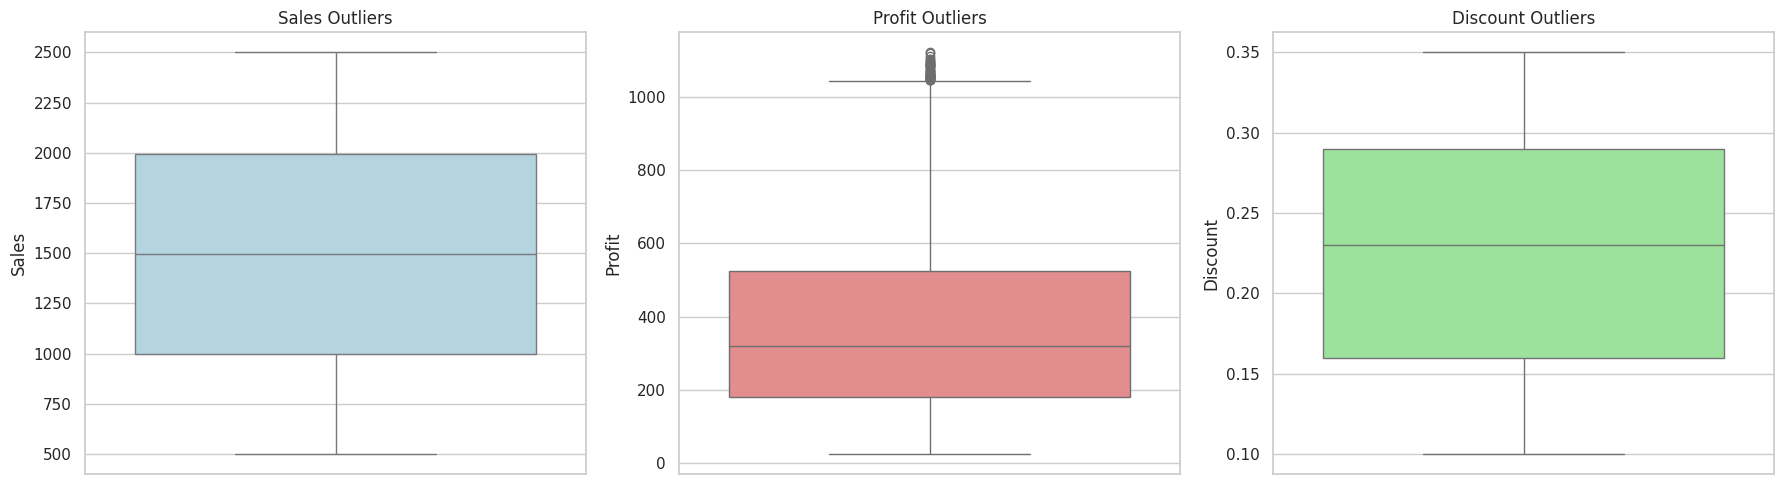

In [28]:
#Sales, Profit and Discount Outliers detection

plt.figure(figsize=(18, 5))

# Sales Boxplot
plt.subplot(1, 3, 1)
sns.boxplot(y=df['Sales'], color='lightblue')
plt.title("Sales Outliers")

# Profit Boxplot
plt.subplot(1, 3, 2)
sns.boxplot(y=df['Profit'], color='lightcoral')
plt.title("Profit Outliers")

# Discount Boxplot
plt.subplot(1, 3, 3)
sns.boxplot(y=df['Discount'], color='lightgreen')
plt.title("Discount Outliers")

plt.tight_layout()
plt.show()

/tmp/ipython-input-29-1850749821.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Category', y='Profit', data=cat_perf, palette='viridis')


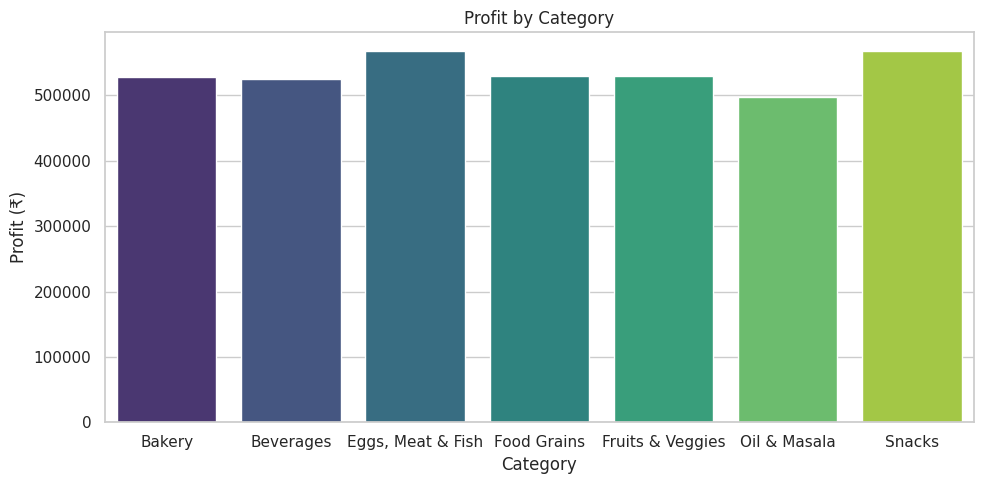

In [29]:
# Group by Category
cat_perf = df.groupby('Category')[['Sales', 'Profit']].sum().reset_index()

plt.figure(figsize=(10, 5))
sns.barplot(x='Category', y='Profit', data=cat_perf, palette='viridis')
plt.title("Profit by Category")
plt.ylabel("Profit (₹)")
plt.tight_layout()
plt.show()

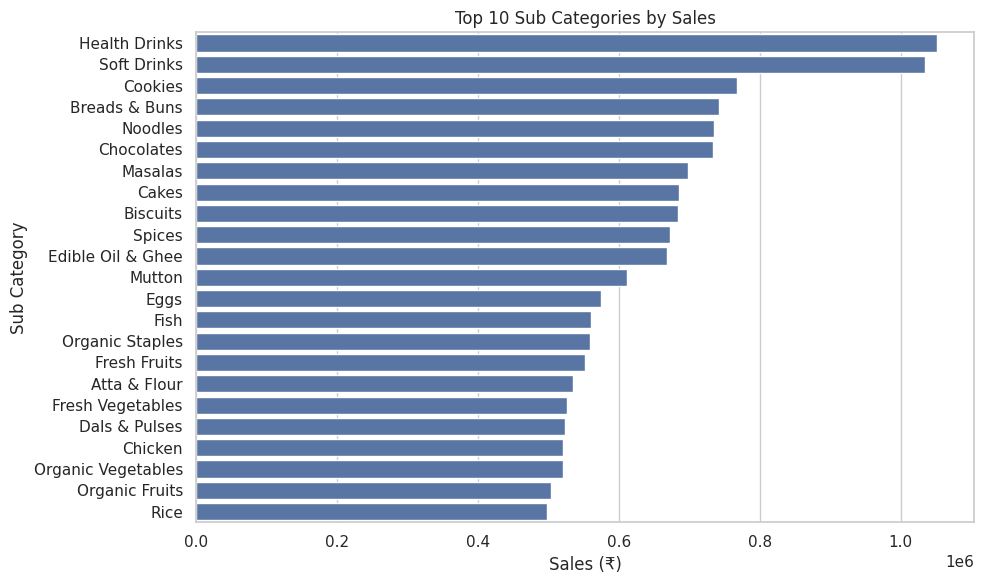

In [30]:
# Group by Sub-Category
top_subcats = df.groupby('Sub Category')['Sales'].sum().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_subcats.values, y=top_subcats.index)
plt.title("Top 10 Sub Categories by Sales")
plt.xlabel("Sales (₹)")
plt.tight_layout()
plt.show()

In [31]:
# Monthly Profit (or Sales if Profit not present)
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Month'] = df['Order Date'].dt.to_period('M')
monthly_sales = df.groupby('Month')['Sales'].sum()
print("\nMonthly Sales Trend:")
print(monthly_sales)


Monthly Sales Trend:
Month
2015-01    122497
2015-02     66030
2015-03    247156
2015-04    203258
2015-05    164263
2015-06    206064
2015-07    220986
2015-08    230161
2015-09    382200
2015-10    241726
2015-11    480979
2015-12    410279
2016-01     89009
2016-02     90823
2016-03    212164
2016-04    237272
2016-05    222722
2016-06    205388
2016-07    215776
2016-08    229543
2016-09    429658
2016-10    249639
2016-11    477720
2016-12    472245
2017-01    131727
2017-02    132982
2017-03    238956
2017-04    247773
2017-05    332524
2017-06    291454
2017-07    315531
2017-08    256089
2017-09    546728
2017-10    308026
2017-11    551815
2017-12    518307
2018-01    234739
2018-02    166267
2018-03    355704
2018-04    310150
2018-05    367411
2018-06    354902
2018-07    337092
2018-08    331014
2018-09    705680
2018-10    443898
2018-11    683410
2018-12    687245
Freq: M, Name: Sales, dtype: int64


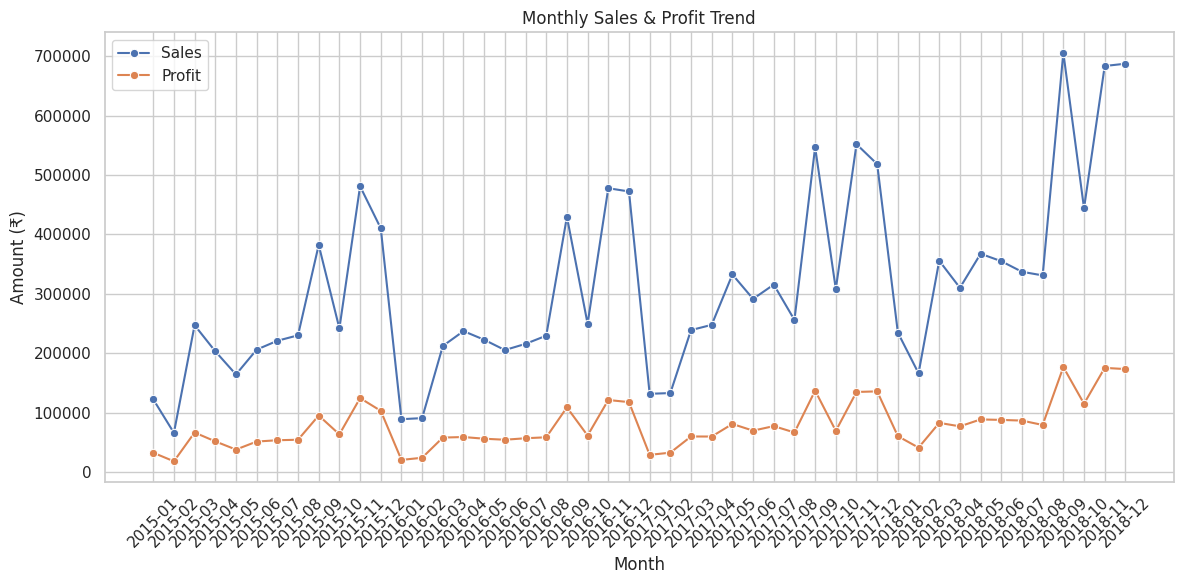

In [32]:
# Monthly Sales and Profit Trend

# Ensure 'Order Date' is in datetime format
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')

# Extract month & year
df['Month'] = df['Order Date'].dt.to_period('M')

# Group by Month
monthly_trend = df.groupby('Month')[['Sales', 'Profit']].sum().reset_index()
monthly_trend['Month'] = monthly_trend['Month'].astype(str)

# Plot
plt.figure(figsize=(12, 6))
sns.lineplot(x='Month', y='Sales', data=monthly_trend, label='Sales', marker='o')
sns.lineplot(x='Month', y='Profit', data=monthly_trend, label='Profit', marker='o')
plt.title("Monthly Sales & Profit Trend")
plt.xlabel("Month")
plt.ylabel("Amount (₹)")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

/tmp/ipython-input-19-3705560042.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  masala_df['Discount_Cluster'] = kmeans.fit_predict(X)
/tmp/ipython-input-19-3705560042.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=masala_df, x='Discount_Cluster', y='Discount', palette='Set2')


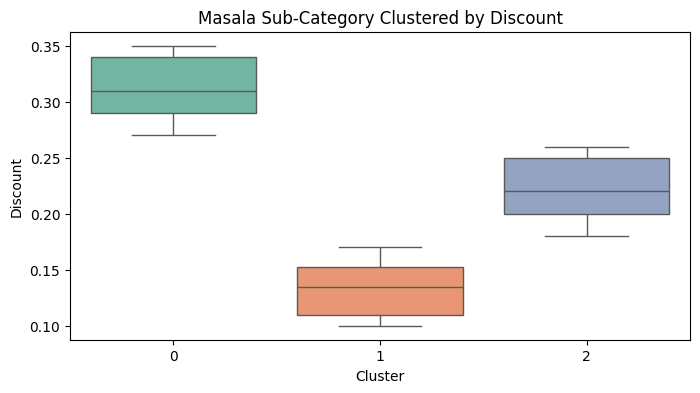

In [19]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Filter for "Masala" sub-category
masala_df = df[df['Sub Category'].str.contains("Masala", case=False)]

# Select only the Discount column
X = masala_df[['Discount']]

# Apply KMeans clustering (e.g., 3 clusters)
kmeans = KMeans(n_clusters=3, random_state=42)
masala_df['Discount_Cluster'] = kmeans.fit_predict(X)

# Visualize the clustering
plt.figure(figsize=(8, 4))
sns.boxplot(data=masala_df, x='Discount_Cluster', y='Discount', palette='Set2')
plt.title("Masala Sub-Category Clustered by Discount")
plt.xlabel("Cluster")
plt.ylabel("Discount")
plt.show()


In [22]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Filter only "Masalas" sub-category
masala_df = df[df['Sub Category'] == 'Masalas'].copy()

# Select only the Discount column
X = masala_df[['Discount']]

# Apply KMeans clustering (e.g., 3 clusters)
kmeans = KMeans(n_clusters=3, random_state=42)
masala_df['Discount_Cluster'] = kmeans.fit_predict(X)

# Save result to df_clustered_masala
df_clustered_masala = masala_df.copy()

# Display first few clustered rows
print(df_clustered_masala[['Discount']].head())

    Discount
0       0.12
29      0.17
33      0.34
60      0.28
69      0.14


    Discount Discount_Cluster
0       0.12                1
29      0.17                1
33      0.34                0
60      0.28                0
69      0.14                1


/tmp/ipython-input-23-516498052.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=masala_df, x='Discount_Cluster', y='Discount', palette='Set2')


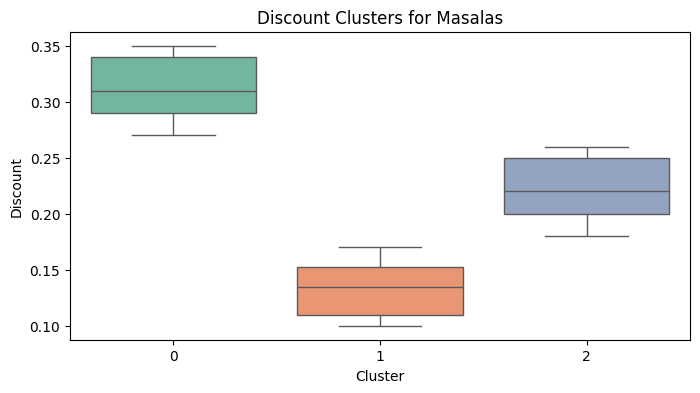

In [23]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Filter only "Masalas" sub-category
masala_df = df[df['Sub Category'] == 'Masalas'].copy()

# Step 2: Select only the Discount column
X = masala_df[['Discount']]

# Step 3: Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
masala_df['Discount_Cluster'] = kmeans.fit_predict(X)

# Optional: Sort clusters for better interpretation
masala_df['Discount_Cluster'] = masala_df['Discount_Cluster'].astype('category')

# Step 4: Save the result
df_clustered_masala = masala_df.copy()

# Step 5: Display first few clustered rows
print(df_clustered_masala[['Discount', 'Discount_Cluster']].head())

# Step 6: Visualize the clusters
plt.figure(figsize=(8, 4))
sns.boxplot(data=masala_df, x='Discount_Cluster', y='Discount', palette='Set2')
plt.title("Discount Clusters for Masalas")
plt.xlabel("Cluster")
plt.ylabel("Discount")
plt.show()


Cluster-wise Summary:
                 Discount          Sales        Profit      
                     mean count     mean count    mean count
Discount_Cluster                                            
0                    0.31   152  1457.64   152  353.72   152
1                    0.13   148  1550.06   148  382.94   148
2                    0.22   163  1512.33   163  359.26   163


/tmp/ipython-input-25-4146673695.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=masala_df, x='Discount_Cluster', y='Discount', palette='Set2')


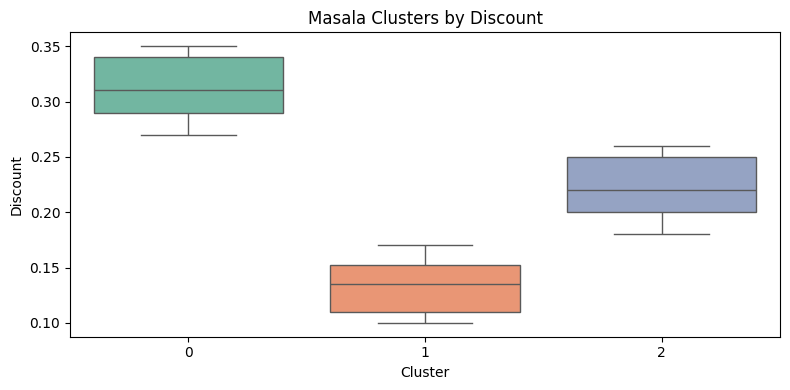

In [25]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns


# Filter only "Masalas" sub-category
masala_df = df[df['Sub Category'] == 'Masalas'].copy()

# Apply KMeans clustering on Discount
X = masala_df[['Discount']]
kmeans = KMeans(n_clusters=3, random_state=42)
masala_df['Discount_Cluster'] = kmeans.fit_predict(X)

# Group and summarize each cluster
cluster_summary = masala_df.groupby('Discount_Cluster')[['Discount', 'Sales', 'Profit']].agg(['mean', 'count']).round(2)
print("Cluster-wise Summary:")
print(cluster_summary)

# Visualize clusters
plt.figure(figsize=(8, 4))
sns.boxplot(data=masala_df, x='Discount_Cluster', y='Discount', palette='Set2')
plt.title("Masala Clusters by Discount")
plt.xlabel("Cluster")
plt.ylabel("Discount")
plt.tight_layout()
plt.show()


Cluster Summary:
         Discount        Profit          Sales      
            mean count    mean count     mean count
Cluster                                            
0           0.29   187  271.15   187  1371.40   187
1           0.20   106  719.43   106  2005.79   106
2           0.16   170  247.26   170  1343.61   170


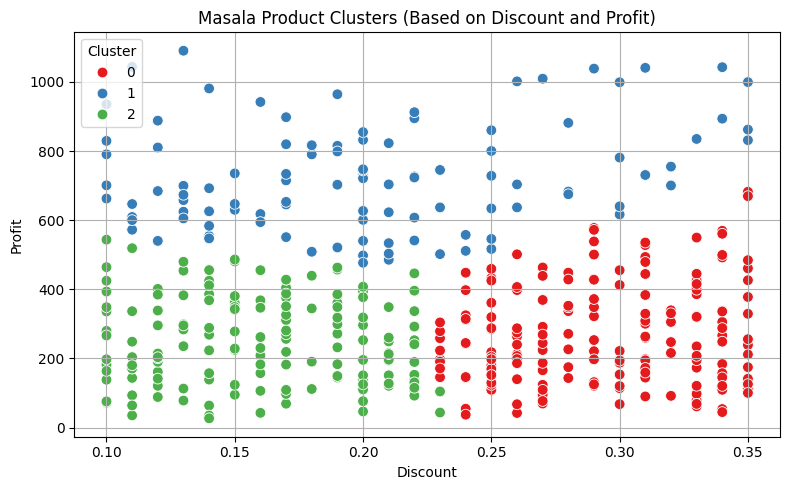

In [26]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Filter for Masalas sub-category
masala_df = df[df['Sub Category'] == 'Masalas'].copy()

# 2. Select Discount and Profit columns
features = masala_df[['Discount', 'Profit']]

# 3. Standardize the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# 4. Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
masala_df['Cluster'] = kmeans.fit_predict(scaled_features)

# 5. Summary of clusters
summary = masala_df.groupby('Cluster')[['Discount', 'Profit', 'Sales']].agg(['mean', 'count']).round(2)
print("Cluster Summary:\n", summary)

# 6. Visualization
plt.figure(figsize=(8, 5))
sns.scatterplot(data=masala_df, x='Discount', y='Profit', hue='Cluster', palette='Set1', s=60)
plt.title("Masala Product Clusters (Based on Discount and Profit)")
plt.xlabel("Discount")
plt.ylabel("Profit")
plt.grid(True)
plt.tight_layout()
plt.show()


Cluster KPIs:
         Discount        Profit          Sales      
            mean count    mean count     mean count
Cluster                                            
0           0.20   148  619.48   148  2100.91   148
1           0.16   151  232.50   151  1149.06   151
2           0.30   164  257.36   164  1299.01   164


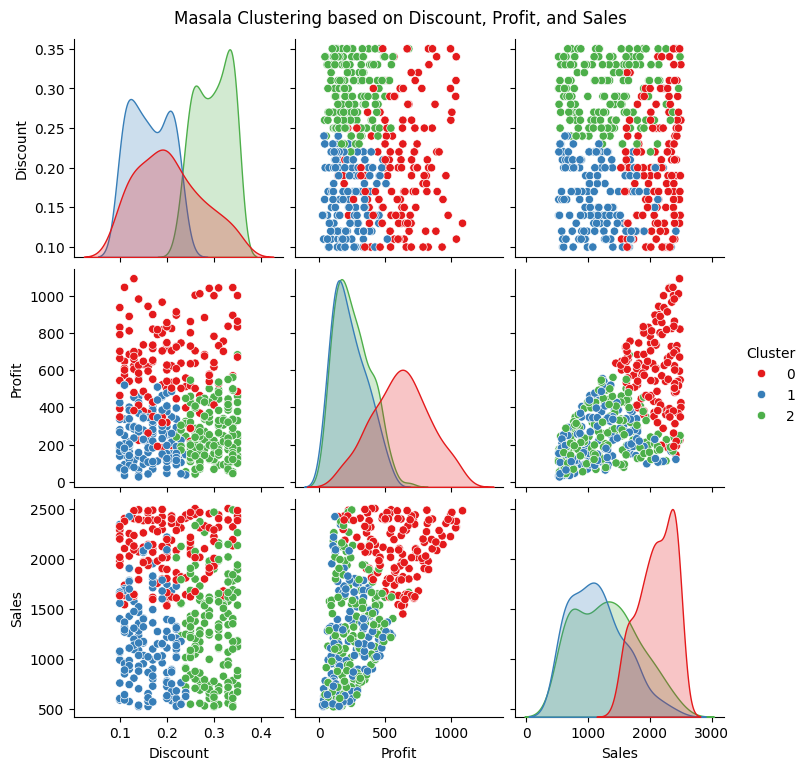

In [28]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Filter only Masalas
masala_df = df[df['Sub Category'] == 'Masalas'].copy()

# 2. Select relevant features
features = masala_df[['Discount', 'Profit', 'Sales']]

# 3. Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# 4. Apply KMeans Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
masala_df['Cluster'] = kmeans.fit_predict(scaled_features)

# 5. Summary statistics
cluster_summary = masala_df.groupby('Cluster')[['Discount', 'Profit', 'Sales']].agg(['mean', 'count']).round(2)
print("Cluster KPIs:\n", cluster_summary)

# 6. Visualize
sns.pairplot(masala_df, vars=['Discount', 'Profit', 'Sales'], hue='Cluster', palette='Set1')
plt.suptitle("Masala Clustering based on Discount, Profit, and Sales", y=1.02)
plt.show()

Cluster Means:
          Discount  Profit    Sales
Cluster                           
0            0.20  619.48  2100.91
1            0.16  232.50  1149.06
2            0.30  257.36  1299.01
    Discount  Profit  Sales  Cluster      Cluster_Label
0       0.12  401.28   1254        1  Average Performer
29      0.17   69.23    989        1  Average Performer
33      0.34  337.80   1689        2        Loss Leader
60      0.28  271.32   1428        2        Loss Leader
69      0.14  554.40   1232        1  Average Performer


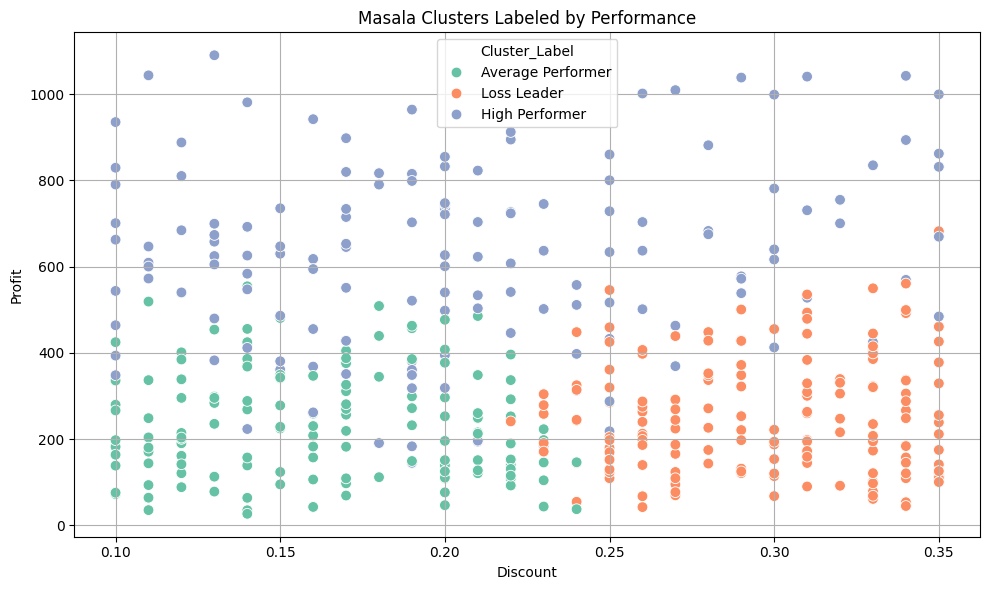

In [29]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Filter Masala sub-category
masala_df = df[df['Sub Category'] == 'Masalas'].copy()

# Select features
features = masala_df[['Discount', 'Profit', 'Sales']]

# Standardize
scaler = StandardScaler()
scaled = scaler.fit_transform(features)

# Apply KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
masala_df['Cluster'] = kmeans.fit_predict(scaled)

# Analyze cluster means
cluster_stats = masala_df.groupby('Cluster')[['Discount', 'Profit', 'Sales']].mean().round(2)
print("Cluster Means:\n", cluster_stats)

# Assign labels based on performance
def label_cluster(row):
    if row['Cluster'] == cluster_stats['Profit'].idxmax():
        return "High Performer"
    elif row['Cluster'] == cluster_stats['Discount'].idxmax():
        return "Loss Leader"
    else:
        return "Average Performer"

masala_df['Cluster_Label'] = masala_df.apply(label_cluster, axis=1)

# View sample with labels
print(masala_df[['Discount', 'Profit', 'Sales', 'Cluster', 'Cluster_Label']].head())

# Visualize clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=masala_df, x='Discount', y='Profit', hue='Cluster_Label', palette='Set2', s=60)
plt.title("Masala Clusters Labeled by Performance")
plt.xlabel("Discount")
plt.ylabel("Profit")
plt.grid(True)
plt.tight_layout()
plt.show()


In [32]:
# Count using business labels
label_counts = masala_df['Cluster_Label'].value_counts()

# Display counts
print(label_counts)


Cluster_Label
Loss Leader          164
Average Performer    151
High Performer       148
Name: count, dtype: int64


In [31]:

# Save to CSV
masala_df.to_csv("Masala_Clusters_Labeled.csv", index=False)


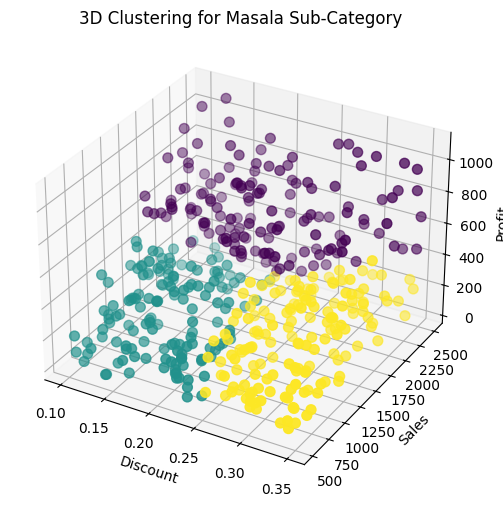

In [33]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(
    masala_df['Discount'],
    masala_df['Sales'],
    masala_df['Profit'],
    c=masala_df['Cluster'], cmap='viridis', s=50
)

ax.set_xlabel('Discount')
ax.set_ylabel('Sales')
ax.set_zlabel('Profit')
plt.title("3D Clustering for Masala Sub-Category")
plt.show()


In [34]:
print("Cluster Sizes:\n", masala_df['Cluster_Label'].value_counts())


Cluster Sizes:
 Cluster_Label
Loss Leader          164
Average Performer    151
High Performer       148
Name: count, dtype: int64


In [35]:
print(masala_df.groupby('Cluster_Label')['Sales'].sum().sort_values(ascending=False))


Cluster_Label
High Performer       310934
Loss Leader          213038
Average Performer    173508
Name: Sales, dtype: int64


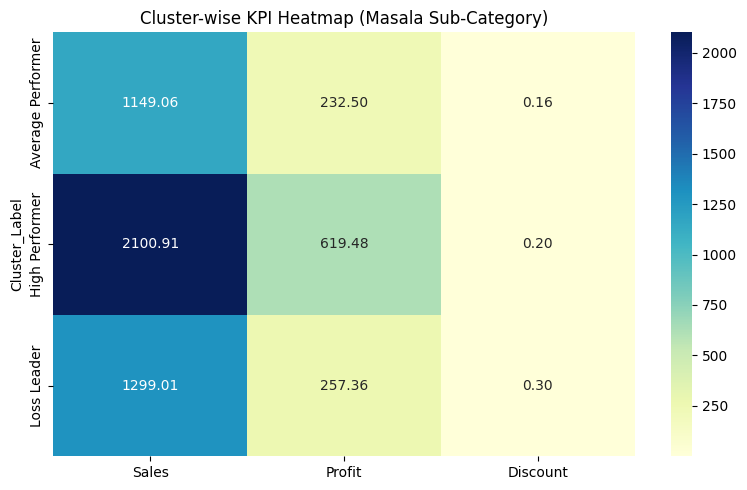

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a pivot of mean metrics by cluster label
cluster_summary = masala_df.groupby('Cluster_Label')[['Sales', 'Profit', 'Discount']].mean().round(2)

# Plot heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(cluster_summary, annot=True, cmap='YlGnBu', fmt='.2f')
plt.title('Cluster-wise KPI Heatmap (Masala Sub-Category)')
plt.tight_layout()
plt.show()


In [43]:
# Filter orders classified as Loss Leaders
loss_leaders = masala_df[masala_df['Cluster_Label'] == 'Loss Leader']

# Display sample
print(loss_leaders[['Order ID', 'Sales', 'Profit', 'Discount']])

# Optional: Save to CSV
# loss_leaders.to_csv("loss_leader_orders.csv", index=False)


     Order ID  Sales  Profit  Discount
33       OD34   1689  337.80      0.34
60       OD61   1428  271.32      0.28
105     OD106   1575   78.75      0.33
381     OD382   1727  224.51      0.27
438     OD439   1648  444.96      0.33
...       ...    ...     ...       ...
9842   OD9843    776  194.00      0.30
9899   OD9900   1233  320.58      0.33
9908   OD9909   1652  479.08      0.31
9916   OD9917   1350  499.50      0.34
9970   OD9971   2132  383.76      0.31

[164 rows x 4 columns]


In [45]:
# Save Loss Leader orders to a CSV file
loss_leaders.to_csv("loss_leader_orders_masala.csv", index=False)

from google.colab import files
files.download("loss_leader_orders_masala.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

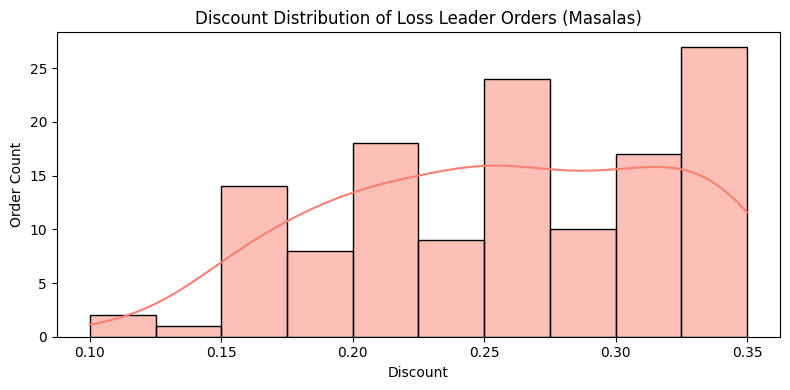

In [58]:
plt.figure(figsize=(8, 4))
sns.histplot(loss_leaders['Discount'], kde=True, bins=10, color='salmon')
plt.title('Discount Distribution of Loss Leader Orders (Masalas)')
plt.xlabel('Discount')
plt.ylabel('Order Count')
plt.tight_layout()
plt.show()
